In [278]:
import numpy as np
import pandas as pd
# matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from google.cloud import bigquery
from bq_helper import BigQueryHelper
%load_ext google.cloud.bigquery
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="My Project-bbdce7b1712b.json"


The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [279]:
bq_assistant = BigQueryHelper("bigquery-public-data", "epa_historical_air_quality")

## We are only looking at SF Data
query="""
SELECT * FROM `bigquery-public-data.epa_historical_air_quality.co_daily_summary`
where state_name ="California" AND city_name="San Francisco"
"""

df = bq_assistant.query_to_pandas(query)
##df=pd.read_csv('carbon-monoxide-results-20181007-145932.csv')

In [280]:
df.shape

(32794, 29)

Check the no of missing values in each column

In [281]:
df.isna().sum()

state_code                 0
county_code                0
site_num                   0
parameter_code             0
poc                        0
latitude                   0
longitude                  0
datum                      0
parameter_name             0
sample_duration            0
pollutant_standard         0
date_local                 0
units_of_measure           0
event_type                 0
observation_count          0
observation_percent        0
arithmetic_mean            0
first_max_value            0
first_max_hour             0
aqi                    16396
method_code            16398
method_name                0
local_site_name            0
address                    0
state_name                 0
county_name                0
city_name                  0
cbsa_name                  0
date_of_last_change        0
dtype: int64

# Data Preprocessing

Remove Missing values in aqi ( Dont Uncomment this)

In [282]:
# from sklearn.preprocessing import Imputer

# imp=Imputer(missing_values='NaN',strategy='mean')

# ## replace missing values in aqi and method code with mean
# df["aqi"]=imp.fit_transform(df[["aqi"]]).ravel()
# df["method_code"]=imp.fit_transform(df[["method_code"]]).ravel()


## Data Visualization

We will measure average aqi for different gases (CO,O3,NO2,SO2)

# Bar Graph for the average AQI over the years for the 4 gases

In [283]:
# For visualization
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Spectral6, brewer
from bokeh.transform import factor_cmap


Avg Air Quality Index for CO over the years in San Francisco

In [284]:
QUERY = """
    SELECT
        EXTRACT(YEAR FROM date_local) as year,
        avg(aqi) as avg_aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.co_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY year
    ORDER BY year ASC
        """
df_co = bq_assistant.query_to_pandas(QUERY)

In [285]:
df_co.year = df_co.year.astype(str)

In [286]:
## Reference https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html
## Bar graph
output_file('average_aqi_CO_over_the_years.html')

source = ColumnDataSource(df_co)
years = source.data['year'].tolist()
p = figure(x_range=years, plot_width=1200, plot_height=800)

color_map = factor_cmap(field_name='year', palette=Spectral6, factors=years)

p.vbar(x='year', top='avg_aqi', source=source, width=0.90)

p.title.text ='Average AQI of Carbon monoxide in different years'
p.xaxis.axis_label = 'Years'
p.yaxis.axis_label = "Average AQI of Carbon monoxide"

show(p)


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/bokeh/models/mappers.py:82: UserWarning: Palette length does not match number of factors. ['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


Avg Air Quality Index for O3 over the years in San Francisco

In [287]:
QUERY = """
    SELECT
        EXTRACT(YEAR FROM date_local) as year,
        avg(aqi) as avg_aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.o3_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY year
    ORDER BY year ASC
        """
df_o3 = bq_assistant.query_to_pandas(QUERY)



In [288]:
df_o3.year = df_o3.year.astype(str)

In [289]:
## Reference https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html
## Bar graph
output_file('average_aqi_O3_over_the_years.html')

source = ColumnDataSource(df_o3)
years = source.data['year'].tolist()
p = figure(x_range=years, plot_width=1200, plot_height=800)

color_map = factor_cmap(field_name='year', palette=Spectral6, factors=years)

p.vbar(x='year', top='avg_aqi', source=source, width=0.90)

p.title.text ='Average AQI of Ozone in different years'
p.xaxis.axis_label = 'Years'
p.yaxis.axis_label = "Average AQI of Ozone"

show(p)


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/bokeh/models/mappers.py:82: UserWarning: Palette length does not match number of factors. ['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


Avg Air Quality Index for NO2 over the years in San Francisco

In [290]:
QUERY = """
    SELECT
        EXTRACT(YEAR FROM date_local) as year,
        avg(aqi) as avg_aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.no2_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY year
    ORDER BY year ASC
        """
df_no2 = bq_assistant.query_to_pandas(QUERY)



In [291]:
df_no2.year = df_no2.year.astype(str)

In [292]:
## Reference https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html
## Bar graph
output_file('average_aqi_no2_over_the_years.html')

source = ColumnDataSource(df_no2)
years = source.data['year'].tolist()
p = figure(x_range=years, plot_width=1200, plot_height=800)

color_map = factor_cmap(field_name='year', palette=Spectral6, factors=years)

p.vbar(x='year', top='avg_aqi', source=source, width=0.90)

p.title.text ='Average AQI of Nitrogen dioxide  in different years'
p.xaxis.axis_label = 'Years'
p.yaxis.axis_label = "Average AQI of Nitrogen dioxide "

show(p)


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/bokeh/models/mappers.py:82: UserWarning: Palette length does not match number of factors. ['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [293]:
##Avg Air Quality Index for SO2 over the years in San Francisco

QUERY = """
    SELECT
        EXTRACT(YEAR FROM date_local) as year,
        avg(aqi) as avg_aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.so2_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY year
    ORDER BY year ASC
        """
df_so2 = bq_assistant.query_to_pandas(QUERY)

df_so2.year = df_so2.year.astype(str)

## Reference https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html
## Bar graph
output_file('average_aqi_so2_over_the_years.html')

source = ColumnDataSource(df_so2)
years = source.data['year'].tolist()
p = figure(x_range=years, plot_width=1200, plot_height=800)

color_map = factor_cmap(field_name='year', palette=Spectral6, factors=years)

p.vbar(x='year', top='avg_aqi', source=source, width=0.90)

p.title.text ='Average AQI of Sulphur dioxide  in different years'
p.xaxis.axis_label = 'Years'
p.yaxis.axis_label = "Average AQI of Sulphur dioxide "

show(p)


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/bokeh/models/mappers.py:82: UserWarning: Palette length does not match number of factors. ['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


Avg Air Quality Index for Particulate Matter over the years in San Francisco

In [294]:
##Avg Air Quality Index for Particulate Matter over the years in San Francisco

QUERY = """
    SELECT
        EXTRACT(YEAR FROM date_local) as year,
        avg(aqi) as avg_aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.pm25_frm_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY year
    ORDER BY year ASC
        """
df_pm25 = bq_assistant.query_to_pandas(QUERY)

df_pm25.year = df_pm25.year.astype(str)

## Reference https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html
## Bar graph
output_file('average_aqi_pm25_over_the_years.html')

source = ColumnDataSource(df_pm25)
years = source.data['year'].tolist()
p = figure(x_range=years, plot_width=1200, plot_height=800)

color_map = factor_cmap(field_name='year', palette=Spectral6, factors=years)

p.vbar(x='year', top='avg_aqi', source=source, width=0.90)

p.title.text ='Average AQI of Particulate Matter in different years'
p.xaxis.axis_label = 'Years'
p.yaxis.axis_label = "Average AQI of Particulate Matter"

show(p)


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/bokeh/models/mappers.py:82: UserWarning: Palette length does not match number of factors. ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [295]:
## RENAME THE COLUMNS OF THE 4 DFS 
## https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
df_co.rename(columns={'avg_aqi': 'avg_aqi_CO'},inplace=True)
df_no2.rename(columns={'avg_aqi': 'avg_aqi_NO2'},inplace=True)
df_o3.rename(columns={'avg_aqi': 'avg_aqi_O3'},inplace=True)
df_so2.rename(columns={'avg_aqi': 'avg_aqi_SO2'},inplace=True)
df_pm25.rename(columns={'avg_aqi': 'avg_aqi_PM25'},inplace=True)

# Compare the Time Series Graphs of all the 5  

In [296]:
## Combine the dataframes ie all 3
from functools import reduce

## Reference: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
frames=[df_co,df_no2,df_o3]
df_final = reduce(lambda left,right: pd.merge(left,right,on='year'), frames)


In [297]:
df_final

,year,avg_aqi_CO,avg_aqi_NO2,avg_aqi_O3
0,1990,26.142462,33.198795,16.027473
1,1991,25.517808,36.589041,16.876033
2,1992,23.959016,32.331507,17.707521
3,1993,21.395890,34.211594,17.424658
4,1994,17.242678,32.905292,17.675978
5,1995,16.334247,32.299451,22.506849
6,1996,15.553279,32.713115,22.308743
7,1997,13.957534,30.379501,20.465753
8,1998,13.384615,29.945205,21.254795
9,1999,13.869863,32.112329,22.156164


In [298]:
colors = ['red', 'blue', 'green']
labels=['CARBON MONOXIDE','NITROGEN DIOXIDE','OZONE']

cols=df_final.columns.tolist()
cols.remove('year')

In [299]:
output_file('COMPARISON_AQI.html')

##https://www.geeksforgeeks.org/python-iterate-multiple-lists-simultaneously/
l = figure(title="COMPARISON OF AQI OF DIFFERENT GASES FROM 1990 TO 2017", logo=None,width=1000, height=500)

for color,label,col in zip(colors, labels, cols):
    source = ColumnDataSource(data=dict(x=df_final['year'].tolist(), y=df_final[col].tolist())) 
    l.line(x='x',y='y',source=source, legend=label, color=color,line_width=5)

source = ColumnDataSource(data=dict(x=df_so2['year'].tolist(), y=df_so2['avg_aqi_SO2'].tolist()))
l.line(x='x',y='y',source=source, legend='SULPHUR DIOXIDE', color="magenta",line_width=5)

source = ColumnDataSource(data=dict(x=df_pm25['year'].tolist(), y=df_pm25['avg_aqi_PM25'].tolist()))
l.line(x='x',y='y',source=source, legend='PARTICULATE MATTER', color="indigo",line_width=5)

l.xaxis.axis_label = 'YEAR'
l.yaxis.axis_label = "AVERAGE AQI"
l.title.text ='Comparison of AQI of CO,O3,NO2,SO2 AND PM'

l.legend.location = "top_right"
l.legend.click_policy="hide"

show(l)

DONT GO BEYOND THIS FOR NOW

In [300]:
result = pd.merge(df_final, df_so2, how='left', on='year')
df_merged = pd.merge(result, df_pm25, how='left', on='year')
df_merged

,year,avg_aqi_CO,avg_aqi_NO2,avg_aqi_O3,avg_aqi_SO2,avg_aqi_PM25
0,1990,26.142462,33.198795,16.027473,6.430986,NaN
1,1991,25.517808,36.589041,16.876033,7.328221,NaN
2,1992,23.959016,32.331507,17.707521,7.445355,NaN
3,1993,21.395890,34.211594,17.424658,6.323288,NaN
4,1994,17.242678,32.905292,17.675978,3.515320,NaN
5,1995,16.334247,32.299451,22.506849,5.591781,NaN
6,1996,15.553279,32.713115,22.308743,4.879781,NaN
7,1997,13.957534,30.379501,20.465753,4.806094,NaN
8,1998,13.384615,29.945205,21.254795,4.076712,NaN
9,1999,13.869863,32.112329,22.156164,6.038356,55.623529


Impute missing values in so2 and pm25

In [301]:
from sklearn.preprocessing import Imputer

imp=Imputer(missing_values='NaN',strategy='mean')

## replace missing values in aqi and method code with mean
df_merged["avg_aqi_SO2"]=imp.fit_transform(df_merged[["avg_aqi_SO2"]]).ravel()
df_merged["avg_aqi_PM25"]=imp.fit_transform(df_merged[["avg_aqi_PM25"]]).ravel()


In [302]:
df_merged

,year,avg_aqi_CO,avg_aqi_NO2,avg_aqi_O3,avg_aqi_SO2,avg_aqi_PM25
0,1990,26.142462,33.198795,16.027473,6.430986,40.171730
1,1991,25.517808,36.589041,16.876033,7.328221,40.171730
2,1992,23.959016,32.331507,17.707521,7.445355,40.171730
3,1993,21.395890,34.211594,17.424658,6.323288,40.171730
4,1994,17.242678,32.905292,17.675978,3.515320,40.171730
5,1995,16.334247,32.299451,22.506849,5.591781,40.171730
6,1996,15.553279,32.713115,22.308743,4.879781,40.171730
7,1997,13.957534,30.379501,20.465753,4.806094,40.171730
8,1998,13.384615,29.945205,21.254795,4.076712,40.171730
9,1999,13.869863,32.112329,22.156164,6.038356,55.623529


SF INCIDENTS DATABASE INCIDENTS PER YEAR

In [303]:
query_sf=""" SELECT EXTRACT(YEAR FROM timestamp) as year,count(distinct unique_key) as no_of_incidents
FROM `bigquery-public-data.san_francisco.sfpd_incidents`
group by year
order by year asc 
"""

df_sf_incidents = bq_assistant.query_to_pandas(query_sf)


In [304]:
df_sf_incidents.year = df_sf_incidents.year.astype(str)
df_combined = pd.merge(df_merged, df_sf_incidents, how='left', on='year')

In [306]:
df_combined["no_of_incidents"]=imp.fit_transform(df_combined[["no_of_incidents"]]).ravel()

In [309]:
df_combined.dtypes

year                object
avg_aqi_CO         float64
avg_aqi_NO2        float64
avg_aqi_O3         float64
avg_aqi_SO2        float64
avg_aqi_PM25       float64
no_of_incidents    float64
dtype: object

Applying Regression

In [423]:

## Serialize df to a pickle object
## Skip every line above
import pickle

picle_out=open('df_merged_frame.pickle','wb')
pickle.dump(df_combined,picle_out)
picle_out.close()

In [424]:
## Deserialize the pickle object to get back the data frame
picle_in=open('df_merged_frame.pickle','rb')
df=pickle.load(picle_in)

In [425]:
## Deserialize the pickle object to get back the data frame
picle_in=open('population/dataframe.pickle','rb')
df_pop_per_yr=pickle.load(picle_in)

In [426]:
## Remove trailing zeroes
df_pop_per_yr['year'] = df_pop_per_yr['year'].astype(str).replace('\.0', '', regex=True)

In [427]:
df_comb = pd.merge(df, df_pop_per_yr, how='inner', on='year')

In [428]:
df_comb['Incidents_per_population']=df_comb['no_of_incidents']/df_comb['Population']

In [429]:
df_pop_per_yr.columns

Index(['year', 'Population'], dtype='object')

In [430]:
df_comb.drop(['no_of_incidents','Population'], axis=1,inplace=True)

In [431]:
df=df_comb

In [432]:
df.corr()

,avg_aqi_CO,avg_aqi_NO2,avg_aqi_O3,avg_aqi_SO2,avg_aqi_PM25,Incidents_per_population
avg_aqi_CO,1.000000,0.861157,-0.906490,0.438333,0.283470,0.751105
avg_aqi_NO2,0.861157,1.000000,-0.878104,0.267517,0.491118,0.632483
avg_aqi_O3,-0.906490,-0.878104,1.000000,-0.308573,-0.400634,-0.701496
avg_aqi_SO2,0.438333,0.267517,-0.308573,1.000000,0.200537,0.171412
avg_aqi_PM25,0.283470,0.491118,-0.400634,0.200537,1.000000,0.352136
Incidents_per_population,0.751105,0.632483,-0.701496,0.171412,0.352136,1.000000


In [433]:
# ## Optional Standard Scaling
# from sklearn.preprocessing import StandardScaler
# df[['avg_aqi_CO', 'avg_aqi_NO2','avg_aqi_O3','avg_aqi_SO2','avg_aqi_PM25']] = StandardScaler().fit_transform(df[['avg_aqi_CO', 'avg_aqi_NO2','avg_aqi_O3','avg_aqi_SO2','avg_aqi_PM25']])

In [434]:
## Optional MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
df[['avg_aqi_CO', 'avg_aqi_NO2','avg_aqi_O3','avg_aqi_SO2','avg_aqi_PM25']] = MinMaxScaler().fit_transform(df[['avg_aqi_CO', 'avg_aqi_NO2','avg_aqi_O3','avg_aqi_SO2','avg_aqi_PM25']])

In [435]:
df

,year,avg_aqi_CO,avg_aqi_NO2,avg_aqi_O3,avg_aqi_SO2,avg_aqi_PM25,Incidents_per_population
0,1990,1.000000,0.795735,0.000000,0.741893,0.397298,0.157640
1,1991,0.972427,1.000000,0.079944,0.970195,0.397298,0.156298
2,1992,0.903621,0.743480,0.158280,1.000000,0.397298,0.155202
3,1993,0.790483,0.856757,0.131631,0.714489,0.397298,0.154066
4,1994,0.607157,0.778051,0.155308,0.000000,0.397298,0.153643
5,1995,0.567058,0.741548,0.610433,0.528357,0.397298,0.152805
6,1996,0.532585,0.766472,0.591769,0.347188,0.397298,0.151275
7,1997,0.462148,0.625870,0.418138,0.328438,0.397298,0.149487
8,1998,0.436859,0.599703,0.492475,0.142847,0.397298,0.148069
9,1999,0.458278,0.730274,0.577394,0.641988,1.000000,0.147217


In [436]:
cols=['avg_aqi_CO', 'avg_aqi_NO2', 'avg_aqi_O3', 'avg_aqi_SO2',
       'avg_aqi_PM25',]

In [437]:
X=df[cols]

In [438]:
Y=df['Incidents_per_population']

In [439]:
X.shape

(28, 5)

In [440]:
Y.shape

(28,)

In [441]:
import statsmodels.api as sm


# Note the difference in argument order
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Incidents_per_population   R-squared:                       0.989
Model:                                  OLS   Adj. R-squared:                  0.987
Method:                       Least Squares   F-statistic:                     425.6
Date:                      Wed, 21 Nov 2018   Prob (F-statistic):           7.28e-22
Time:                              16:14:05   Log-Likelihood:                 77.710
No. Observations:                        28   AIC:                            -145.4
Df Residuals:                            23   BIC:                            -138.8
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
avg_aqi_CO       0.1072      0.029      3.660      0.001       0.047       0.168
avg_aqi_NO2      0.0455      0.028      1.605      0.122      -0.013       0.104
avg_aqi_O3       0.1290      0.010     12.650      0.000       0.108       0.150
avg_aqi_SO2     -0.0088      0.016     -0.542      0.593      -0.042       0.025
avg_aqi_PM25     0.0301      0.018      1.659      0.111      -0.007       0.068
==============================================================================
Omnibus:                        1.961   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                1.379
Skew:                          -0.542   Prob(JB):                        0.502
Kurtosis:                       2.922   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [442]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)

predictions = lm.predict(X)
print('Accuracy of model=',lm.score(X,Y))


Accuracy of model= 0.6578821228122382


In [443]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(19, 5) (19,)
(9, 5) (9,)


In [444]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0,0.5,'Predictions')

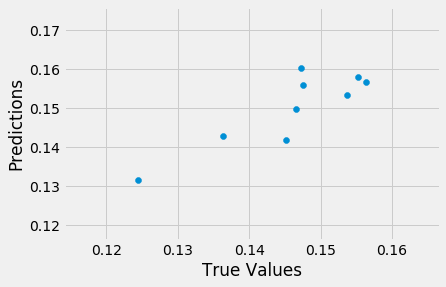

In [445]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [446]:
## R2 score Evaluation
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

from sklearn.metrics import r2_score

print("r2 train: %.3f, test : %.3f" %(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred) ))

r2 train: 0.586, test : 0.548


In [447]:
## Reference https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [448]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, Y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# LASSO Regression

In [449]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

# Elastic Net Regression

In [450]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))


# Kernel Ridge Regression

In [451]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)


# Gradient Boosting Regression

In [452]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

# XGBoost

In [453]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

# Model Evaluation Scores

In [454]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0079 (0.0041)



In [455]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0079 (0.0041)



In [456]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.0069 (0.0046)



In [457]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.0100 (0.0047)



In [458]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0283 (0.0101)



Useless Stuff after this

In [ ]:
QUERY = """
    SELECT
        EXTRACT(YEAR FROM date_local) as year,
        avg(aqi) as avg_aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.co_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY year
    ORDER BY year ASC
        """
df_co = bq_assistant.query_to_pandas(QUERY)

plt.subplots(figsize=(15,7))
sns.barplot(x='year',y='avg_aqi',data=df_co,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Air Quality Index', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Year', fontsize=20)
plt.title('Average AQI of Carbon monoxide in different years', fontsize=24)
plt.show()

In [ ]:
QUERY = """
   SELECT EXTRACT(month FROM co_summary.date_local) as month,avg(co_summary.aqi) as avg_aqi
FROM `bigquery-public-data.epa_historical_air_quality.co_daily_summary` as co_summary
where state_name ="California" AND city_name="San Francisco" and  EXTRACT(YEAR FROM co_summary.date_local)=2016
group by month
order by month asc
        """
df_co_month = bq_assistant.query_to_pandas(QUERY)

plt.subplots(figsize=(15,7))
sns.barplot(x='month',y='avg_aqi',data=df_co_month,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Air Quality Index', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Month', fontsize=20)
plt.title('Average AQI of Carbon monoxide in 2016 in  different months', fontsize=24)
plt.show()


In [ ]:
df.isnull().sum()

In [ ]:
## Fill missing values with zero
df["aqi"].fillna(0, inplace=True)
df["method_code"].fillna(0, inplace=True)


In [ ]:
df.describe()

In [ ]:
columns = df.columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True)


In [ ]:
missing_value_df

In [ ]:
from sklearn.preprocessing import Imputer

imp=Imputer(missing_values='NaN',strategy='mean')

df["aqi"]=imp.fit_transform(df[["aqi"]]).ravel()
df["method_code"]=imp.fit_transform(df[["method_code"]]).ravel()


In [ ]:
set(df['county_code'])

In [ ]:
df.nunique()

In [ ]:
df_co